In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
address = r'C:\Users\hp\Python Learning\\'
hr = pd.read_csv(address + 'HR.csv')
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [135]:
# Набор данных не содержит пропущенных значений
for metric in hr.columns:
    print(metric)
    print(hr[metric].describe())
    print()
    print(hr.sort_values(by=metric)[metric].unique())
    print()

satisfaction_level
count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

[0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22
 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36
 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5
 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]

last_evaluation
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

[0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.4

<AxesSubplot:>

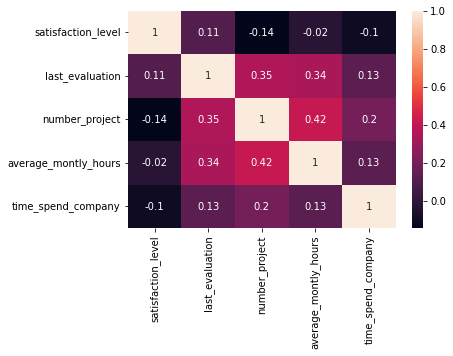

In [5]:
corr_matrix = hr[[
    'satisfaction_level', 
    'last_evaluation', 
    'number_project',
    'average_montly_hours', 
    'time_spend_company']].corr()

sn.heatmap(corr_matrix, annot = True)

In [6]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [61]:
corr_matrix_top = corr_matrix.stack().to_frame().reset_index().sort_values(by=0, ascending=False)
corr_matrix_top['corr_power'] = corr_matrix_top[0].apply(lambda x: abs(x))
corr_matrix_top['corr_direction'] = corr_matrix_top[0].apply(lambda x: x//abs(x))
corr_matrix_top['correlation'] = corr_matrix_top.apply(lambda x: x['corr_power']*x['corr_direction'], axis=1)

# Примем, что 0.3 - это минимальный уровень для признания корреляции
corr_matrix_top_filtered = (corr_matrix_top
                            [corr_matrix_top[0] != 1. ]
                            [corr_matrix_top['corr_power'] > 0.3]
                            [['level_0','level_1','correlation']]
                           )

# Самые скоррелированные переменные
corr_matrix_top_filtered.pivot(index='level_0', 
                               columns='level_1', 
                               values='correlation')

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


level_1,average_montly_hours,last_evaluation,number_project
level_0,,,
average_montly_hours,NaN,0.339742,0.417211
last_evaluation,0.339742,NaN,0.349333
number_project,0.417211,0.349333,NaN


In [67]:
# Наименее скоррелированные переменные
(corr_matrix_top
 .sort_values(by='corr_power')
 .head(6)[['level_0','level_1','correlation']]
 .pivot(index='level_0',
        columns='level_1',
        values='correlation')
)

level_1,average_montly_hours,last_evaluation,satisfaction_level,time_spend_company
level_0,,,,
average_montly_hours,NaN,NaN,-0.020048,NaN
last_evaluation,NaN,NaN,0.105021,NaN
satisfaction_level,-0.020048,0.105021,NaN,-0.100866
time_spend_company,NaN,NaN,-0.100866,NaN


,департамент,сотрудников
0,sales,3126.0
1,technical,2023.0
2,support,1674.0
3,IT,954.0
4,product_mng,704.0
5,RandD,666.0
6,marketing,655.0
7,accounting,563.0
8,management,539.0
9,hr,524.0


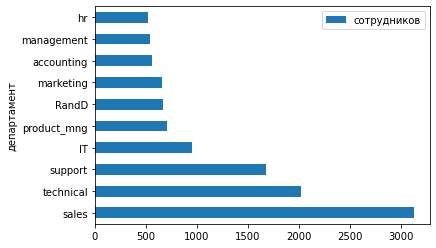

In [136]:
# Количество сотрудников в каждом департаменте
staff = (hr['department']
         [ hr['left'] == 0 ] # Без уточнений - уволившиеся сотрудники не считаются
         .reset_index()
         .groupby(['department'])
         .describe()
         .sort_values(by=('index', 'count'), ascending=False)
         .reset_index()
         [[('department',      ''),
           (     'index', 'count')]]
        )

staff.columns=['департамент','сотрудников']

staff.set_index('департамент').plot.barh()

staff

In [127]:
def salary_rate(data_set, all_departments=True, depart=None):
    if all_departments:
        department = f'всех департаментов'
        salary = data_set
    else:
        department = f'департамента {depart}'
        salary = data_set[data_set['department'] == depart]
        
    salary = (salary
              [salary['left'] == 0]
              ['salary']
              .reset_index()
              .groupby('salary')
              .count()
              .reset_index())

    
    total_count = salary['index'].sum()
    
    salary['staff_rate'] = salary['index'].apply(lambda x: round(x/total_count,2))
    
    salary.columns = [['Уровень','Сотрудников','Доля']]
    
    print(f'Распределение персонала {department} по зарплате:')
    print(salary)
    print('='*100)
    
salary_rate(hr)

Распределение персонала всех департаментов по зарплате:
  Уровень Сотрудников  Доля
0    high        1155  0.10
1     low        5144  0.45
2  medium        5129  0.45


In [128]:
for department in hr['department'].unique():
    salary_rate(hr, all_departments=False, depart=department)

Распределение персонала департамента sales по зарплате:
  Уровень Сотрудников  Доля
0    high         255  0.08
1     low        1402  0.45
2  medium        1469  0.47
Распределение персонала департамента accounting по зарплате:
  Уровень Сотрудников  Доля
0    high          69  0.12
1     low         259  0.46
2  medium         235  0.42
Распределение персонала департамента hr по зарплате:
  Уровень Сотрудников  Доля
0    high          39  0.07
1     low         243  0.46
2  medium         242  0.46
Распределение персонала департамента technical по зарплате:
  Уровень Сотрудников  Доля
0    high         176  0.09
1     low         994  0.49
2  medium         853  0.42
Распределение персонала департамента support по зарплате:
  Уровень Сотрудников  Доля
0    high         133  0.08
1     low         757  0.45
2  medium         784  0.47
Распределение персонала департамента management по зарплате:
  Уровень Сотрудников  Доля
0    high         224  0.42
1     low         121  0.22
2  medi

In [134]:
hr[['left','salary','average_montly_hours']].groupby(['left','salary']).describe()

print('''Разведочный анализ данных показывает, 
что для действующих и ушедших сотрудников наблюдаются разныее тендении''')

average_montly_hours                                              \
                           count        mean        std    min    25%    50%   
left salary                                                                    
0    high                 1155.0  200.348052  46.565231   96.0  163.0  201.0   
     low                  5144.0  198.617418  45.488365   96.0  162.0  197.0   
     medium               5129.0  199.214272  45.679143   96.0  161.0  199.0   
1    high                   82.0  193.097561  61.586356  128.0  146.5  157.0   
     low                  2172.0  206.631215  61.312993  126.0  146.0  222.0   
     medium               1317.0  209.610478  60.890911  126.0  146.0  228.0   

                            
                75%    max  
left salary                 
0    high    239.50  287.0  
     low     238.00  287.0  
     medium  239.00  287.0  
1    high    255.75  307.0  
     low     261.00  310.0  
     medium  263.00  310.0

In [145]:
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [155]:
hr[['salary','average_montly_hours']]

,salary,average_montly_hours
0,low,157
1,medium,262
2,medium,272
3,low,223
4,low,159
...,...,...
14994,low,151
14995,low,160
14996,low,143
14997,low,280


<AxesSubplot:xlabel='average_montly_hours', ylabel='salary'>

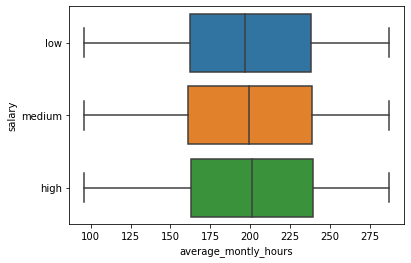

In [159]:
# Наблюдается небольшая разница в средних.
sn.boxplot(x="average_montly_hours", 
           y="salary", 
           data=hr[['salary','average_montly_hours']][hr['left'] == 0]
          )

In [167]:
# Нельзя отвергать нулевую гипотезу, 
# что в сотрудники с высоким окладом проводят 
# столько же времени, что и с низким

from scipy import stats
rng = np.random.default_rng()

rvs1 = hr[['average_montly_hours']][hr['left'] == 0][hr['salary'] == 'high']
rvs2 = hr[['average_montly_hours']][hr['left'] == 0][hr['salary'] == 'low']
t_statistic, p_value = stats.ttest_ind(rvs1, rvs2)

print(f'''
Т-статитика: {t_statistic[0]:.5%} 
P_значение: {p_value[0]:.5%}
P_значение меньше 0.05: {p_value[0] < 0.05}
''')


Т-статитика: 116.33552% 
P_значение: 24.47295%
P_значение меньше 0.05: False



C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [183]:
hr_staff = hr[['left','promotion_last_5years','satisfaction_level','number_project']]

hr_staff.head(3)

,left,promotion_last_5years,satisfaction_level,number_project
0,1,0,0.38,2
1,1,0,0.80,5
2,1,0,0.11,7


In [201]:
def summary(x):
    result = {
        'доля сотрудников с повышением за 5 лет': x.reset_index()['promotion_last_5years'].sum() / x['promotion_last_5years'].count(),        
        'средняя степень удовлетворенности': x['satisfaction_level'].mean(),
        'среднее количество проектов': x['number_project'].mean(),
    }
    return pd.Series(result).round(2)

hr_staff.groupby(['left']).apply(summary)

,доля сотрудников с повышением за 5 лет,средняя степень удовлетворенности,среднее количество проектов
left,,,
0,0.03,0.67,3.79
1,0.01,0.44,3.86


In [ ]:
Разделить на тестовую и обучающую
LDA - уволился ли сотрудник (кроме департамента и зарплаты)
оценить качество модели

In [203]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [202]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [215]:
test_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']

In [216]:
x_train,x_test,y_train,y_test=train_test_split(
    hr[test_columns], 
    hr['left'],
    test_size=0.2)

In [217]:
lda = LDA()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [211]:
prediction = lda.predict(x_test)
prediction

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [218]:
result = pd.DataFrame([y_test, prediction]).T
result.columns=['target','prediction']
result = result.sort_values(by='prediction')

result

,target,prediction
2494,0.0,0.0
2202,0.0,0.0
2351,0.0,0.0
468,1.0,0.0
1913,1.0,0.0
...,...,...
14291,1.0,NaN
5817,0.0,NaN
9000,0.0,NaN
13111,0.0,NaN


In [238]:
accuracy = accuracy_score(y_test, prediction)

print(f'Точность прдсказания: {accuracy:.2%}')

Точность прдсказания: 69.67%


In [220]:
lda.means_

array([[6.66423645e-01, 7.15771210e-01, 3.78708265e+00, 1.98903339e+02,
        3.37296114e+00, 1.74603175e-01, 2.62725780e-02],
       [4.41263966e-01, 7.16819134e-01, 3.84427374e+00, 2.06885126e+02,
        3.87465084e+00, 4.71368715e-02, 5.58659218e-03]])

satisfaction_level
[0.66642365 0.44126397]


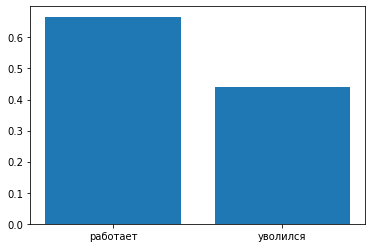

last_evaluation
[0.71577121 0.71681913]


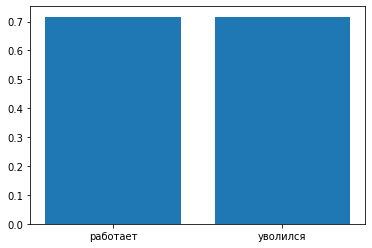

number_project
[3.78708265 3.84427374]


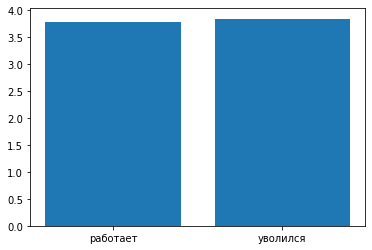

average_montly_hours
[198.90333881 206.8851257 ]


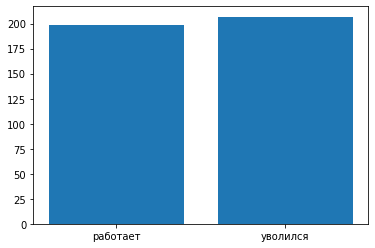

time_spend_company
[3.37296114 3.87465084]


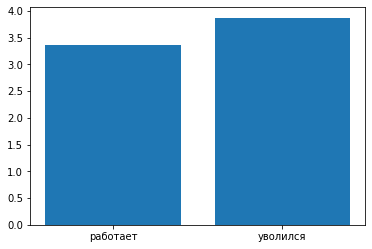

Work_accident
[0.17460317 0.04713687]


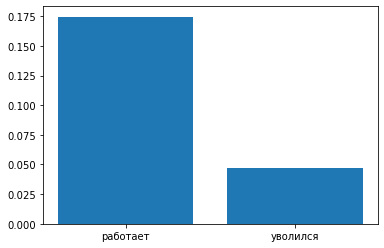

promotion_last_5years
[0.02627258 0.00558659]


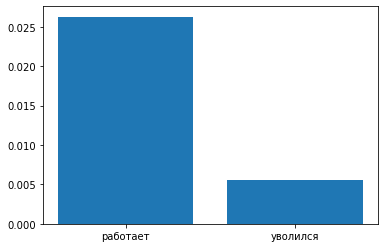

In [236]:
for col in range(len(test_columns)):
    print(test_columns[col])
    means = lda.means_[:,col]
    print(means)
    plt.bar(['работает','уволился'], height = means)
    plt.show()
    